In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# loading the data
cars = pd.read_csv("cars.csv")


In [3]:
cars.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [4]:
cars.corr()


,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [5]:
# we see there exists High collinearity between input variables especially between
# [Hp & SP] , [VOL,WT] so there exists collinearity problem


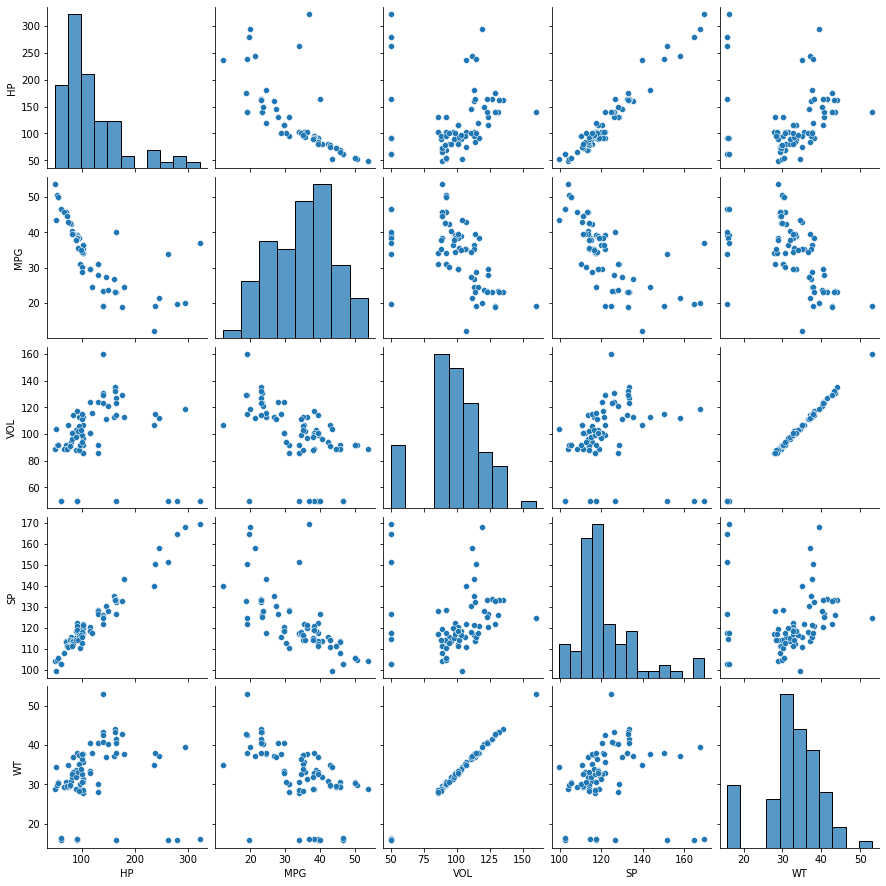

In [6]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars)


In [7]:
# columns names
cars.columns


Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [8]:
# pd.tools.plotting.scatter_matrix(cars); -> also used for plotting all in one graph
                             
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
  

In [9]:
# Preparing model                  
ml1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit() # regression model


In [10]:
# Getting coefficients of variables               
ml1.params


Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [11]:
# Summary
ml1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.54e-23
Time:                        08:59:34   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# p-values for WT,VOL are more than 0.05 and also we know that [WT,VOL] has high correlation value 


In [13]:
# preparing model based only on Volume
ml_v=smf.ols('MPG~VOL',data = cars).fit()  


In [14]:
ml_v.summary() # 0.271


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           3.82e-07
Time:                        09:01:01   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# p-value <0.05 .. It is significant 

# Preparing model based only on WT
ml_w=smf.ols('MPG~WT',data = cars).fit()  
ml_w.summary() # 0.268


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           4.38e-07
Time:                        09:01:28   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Preparing model based only on WT & VOL
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.43e-06
Time:                        09:01:58   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Both coefficients p-value became insignificant... 
# So there may be a chance of considering only one among VOL & WT

# Checking whether data has any influential values 
# influence index plots


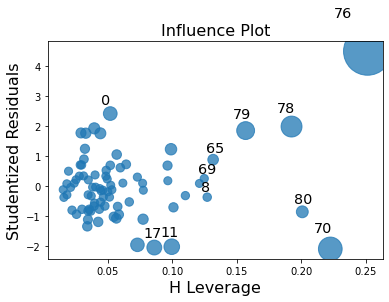

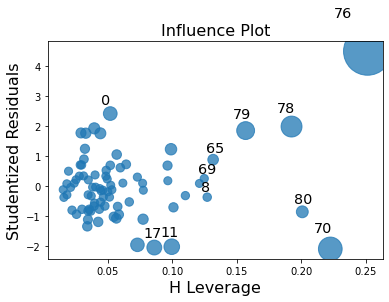

In [18]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)


In [19]:
# index 76 AND 78 is showing high influence so we can exclude that entire row

# Studentized Residuals = Residual/standard deviation of residuals

cars_new=cars.drop(cars.index[[76,70]],axis=0)


In [20]:
# Preparing model                  
ml_new = smf.ols('MPG~WT+VOL+HP+SP',data = cars_new).fit()    

# Getting coefficients of variables        
ml_new.params

Intercept    25.262686
WT           -0.130515
VOL          -0.138784
HP           -0.229533
SP            0.443356
dtype: float64

In [21]:
# Summary
ml_new.summary() # 0.806


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     82.15
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.89e-26
Time:                        09:07:46   Log-Likelihood:                -219.05
No. Observations:                  79   AIC:                             448.1
Df Residuals:                      74   BIC:                             460.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2627     13.495      1.872      0.065      -1.627      52.152
WT            -0.1305      1.519     -0.086      0.932      -3.158       2.897
VOL           -0.1388      0.510     -0.272      0.786      -1.155       0.877
HP            -0.2295      0.035     -6.489      0.000      -0.300      -0.159
SP             0.4434      0.144      3.081      0.003       0.157       0.730
==============================================================================
Omnibus:                        6.476   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.764
Skew:                           0.617   Prob(JB):                       0.0560
Kurtosis:                       3.479   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Confidence values 99%
print(ml_new.conf_int(0.01)) # 99% confidence level


                   0          1
Intercept -10.416762  60.942135
WT         -4.147683   3.886654
VOL        -1.486618   1.209049
HP         -0.323055  -0.136010
SP          0.062873   0.823838


In [23]:
# Predicted values of MPG 
mpg_pred = ml_new.predict(cars_new[['WT','VOL','HP','SP']])
mpg_pred


0     44.101073
1     42.650709
2     42.686370
3     42.732995
4     42.741815
        ...    
75    20.514193
77    16.483189
78    23.110302
79    10.349075
80    13.680984
Length: 79, dtype: float64

In [24]:
cars_new.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [26]:
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars_new).fit().rsquared  
vif_hp = 1/(1-rsq_hp)
vif_hp 

14.927705081455661

In [27]:
rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars_new).fit().rsquared  
vif_wt = 1/(1-rsq_wt)
vif_wt

567.7797106222876

In [29]:
rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars_new).fit().rsquared  
vif_vol = 1/(1-rsq_vol)
vif_vol

566.722324344509

In [31]:
rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp)
vif_sp

15.29051089081452

In [32]:
# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,14.927705
1,WT,567.779711
2,VOL,566.722324
3,SP,15.290511


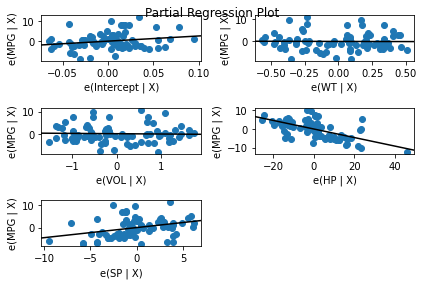

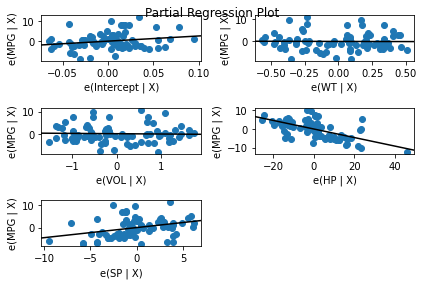

In [33]:
# As weight is having higher VIF value, we are not going to include this prediction model

# Added varible plot 
sm.graphics.plot_partregress_grid(ml_new)


In [34]:
# added varible plot for weight is not showing any significance 

# final model

In [35]:
final_ml= smf.ols('MPG~VOL+SP+HP',data = cars_new).fit()
final_ml.params

Intercept    25.527511
VOL          -0.182530
SP            0.441482
HP           -0.229084
dtype: float64

In [36]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.65e-27
Time:                        09:12:32   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# As we can see that r-squared value has increased from 0.810 to 0.812.


In [38]:
mpg_pred = final_ml.predict(cars_new)


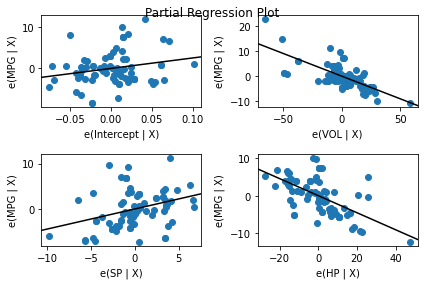

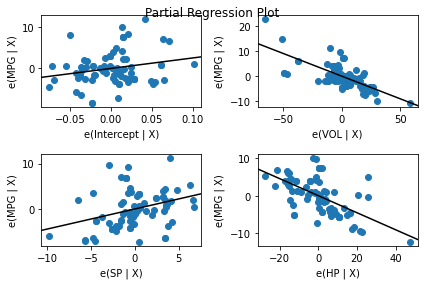

In [39]:
import statsmodels.api as sm
# added variable plot for the final model
sm.graphics.plot_partregress_grid(final_ml)


Text(0, 0.5, 'fitted_values')

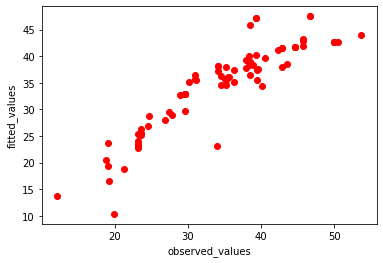

In [40]:
######  Linearity #########

# Observed values VS Fitted values
plt.scatter(cars_new.MPG,mpg_pred,c="r");plt.xlabel("observed_values");plt.ylabel("fitted_values")


Text(0, 0.5, 'residuals')

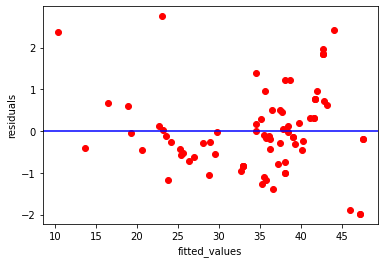

In [41]:
# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")



(array([ 3.,  6., 12., 21., 15., 10.,  4.,  1.,  4.,  3.]),
 array([-1.98480369, -1.51158404, -1.0383644 , -0.56514475, -0.09192511,
         0.38129454,  0.85451418,  1.32773383,  1.80095347,  2.27417312,
         2.74739276]),
 <BarContainer object of 10 artists>)

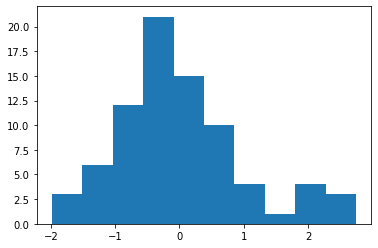

In [42]:
########    Normality plot for residuals ######
# histogram
plt.hist(final_ml.resid_pearson) 

In [43]:
# QQ plot for residuals 
import pylab          
import scipy.stats as st


((array([-2.37663702, -2.02958204, -1.82767017, -1.68081377, -1.5632274 ,
         -1.46398099, -1.37736584, -1.30000518, -1.22972736, -1.16504879,
         -1.10490843, -1.04851956, -0.99528161, -0.94472489, -0.89647454,
         -0.8502261 , -0.80572849, -0.76277189, -0.72117887, -0.68079772,
         -0.64149747, -0.60316407, -0.5656973 , -0.52900844, -0.49301835,
         -0.45765594, -0.4228569 , -0.38856265, -0.35471952, -0.32127797,
         -0.288192  , -0.25541861, -0.22291736, -0.19064996, -0.15857989,
         -0.12667214, -0.09489286, -0.06320916, -0.0315888 ,  0.        ,
          0.0315888 ,  0.06320916,  0.09489286,  0.12667214,  0.15857989,
          0.19064996,  0.22291736,  0.25541861,  0.288192  ,  0.32127797,
          0.35471952,  0.38856265,  0.4228569 ,  0.45765594,  0.49301835,
          0.52900844,  0.5656973 ,  0.60316407,  0.64149747,  0.68079772,
          0.72117887,  0.76277189,  0.80572849,  0.8502261 ,  0.89647454,
          0.94472489,  0.99528161,  1.

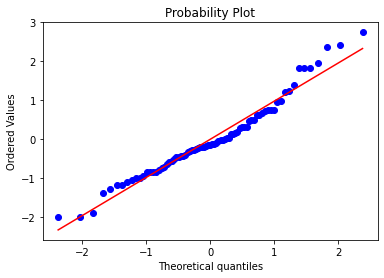

In [44]:
# Checking Residuals are normally distributed
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)



Text(0, 0.5, 'residuals')

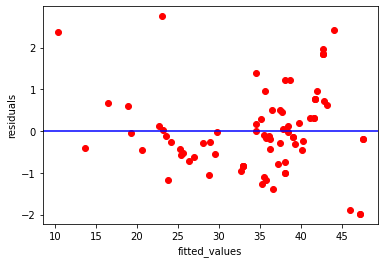

In [45]:
############ Homoscedasticity #######

# Residuals VS Fitted Values 
plt.scatter(mpg_pred,final_ml.resid_pearson,c="r"),plt.axhline(y=0,color='blue');plt.xlabel("fitted_values");plt.ylabel("residuals")


In [46]:
### Splitting the data into train and test data 

from sklearn.model_selection import train_test_split
cars_train,cars_test  = train_test_split(cars_new,test_size = 0.2) # 20% size


In [47]:
# preparing the model on train data 

model_train = smf.ols("MPG~HP+SP+VOL",data=cars_train).fit()


In [54]:
# train_data prediction
train_pred = model_train.predict(cars_train)
train_pred

77    17.055224
42    37.320030
37    38.202220
61    29.041963
41    35.551865
        ...    
16    41.464460
59    32.726190
50    33.161889
28    38.629791
27    38.883527
Length: 63, dtype: float64

In [55]:
# train residual values 
train_resid  = train_pred - cars_train.MPG
train_resid

77   -2.142663
42    3.249362
37    4.131552
61    4.432832
41    0.399138
        ...   
16   -1.325449
59    3.865965
50    3.531953
28   -4.839643
27    0.472523
Length: 63, dtype: float64

In [56]:
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

4.031668516316427

In [57]:
# prediction on test data set 
test_pred = model_train.predict(cars_test)
test_pred

64    25.885435
31    37.449567
39    35.746852
38    38.202220
56    35.744002
44    36.164063
71    22.858443
51    33.161889
10    41.612671
23    39.663044
32    37.408992
29    36.132670
5     43.090989
43    38.198436
2     42.624398
22    38.347326
dtype: float64

In [58]:
# test residual values 
test_resid  = test_pred - cars_test.MPG
test_resid

64    2.280277
31   -1.981669
39    4.732721
38    4.131552
56    4.630418
44    0.520506
71   -0.345126
51    3.531953
10   -3.040163
23   -0.811680
32    1.123536
29    0.728478
5    -2.605333
43    3.045709
2    -7.389003
22    0.036720
dtype: float64

In [59]:
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid*test_resid))
test_rmse

3.2138158673566894